In [1]:
import numpy as np
from emo_utils import *
import emoji
import matplotlib.pyplot as plt

%matplotlib inline

## Emojifier-V1

In [2]:
X_train, Y_train = read_csv('data/train_emoji.csv')
X_test, Y_test = read_csv('data/tesss.csv')

In [3]:
maxLen = len(max(X_train, key=lambda x: len(x.split())).split())

In [4]:
emoji_dictionary = {"0": ":heart:",
                    "1": ":baseball:",
                    "2": ":smile:",
                    "3": ":disappointed:",
                    "4": ":fork_and_knife:"}

def label_to_emoji(label):
    return emoji.emojize(emoji_dictionary[str(label)], use_aliases=True)

In [5]:
for idx in range(15):
    print(X_train[idx], label_to_emoji(Y_train[idx]))

never talk to me again 😞
I am proud of your achievements 😄
It is the worst day in my life 😞
Miss you so much ❤
food is life 🍴
I love you mum ❤
Stop saying bullshit 😞
congratulations on your acceptance 😄
The assignment is too long  😞
I want to go play ⚾
she did not answer my text  😞
Your stupidity has no limit 😞
how many points did he score ⚾
my algorithm performs poorly 😞
I got approved 😄


<center>
<img src="images/image_1.png" style="width:900px;height:300px;">
    <caption><center><font color='purple'><b>Figure 2</b>: Baseline model (Emojifier-V1).</center></caption>
</center></font>

In [6]:
Y_oh_train = convert_to_one_hot(Y_train, C = 5)
Y_oh_test = convert_to_one_hot(Y_test, C = 5)

In [7]:
idx = 50
print(f"Sentence '{X_train[idx]}' has label index {Y_train[idx]}, which is emoji {label_to_emoji(Y_train[idx])}")
print(f"Label index {Y_train[idx]} in one-hot encoding format is {Y_oh_train[idx]}")

Sentence 'I missed you' has label index 0, which is emoji ❤
Label index 0 in one-hot encoding format is [1. 0. 0. 0. 0.]


In [8]:
def read_glove_vecs(glove_file):
    with open(glove_file, 'r') as f:
        words = set()
        word_to_vec_map = {}
        for line in f:
            line = line.strip().split()
            curr_word = line[0]
            words.add(curr_word)
            word_to_vec_map[curr_word] = np.array(line[1:], dtype=np.float64)
            
        i = 1
        words_to_index = {}
        index_to_words = {}
        for w in sorted(words):
            words_to_index[w] = i
            index_to_words[i] = w
            i = i + 1
    return words_to_index, index_to_words, word_to_vec_map

In [9]:
word_to_index, index_to_word, word_to_vec_map = read_glove_vecs('data/glove.6B.50d.txt')

In [10]:
word = "cucumber"
idx = 289846
print("the index of", word, "in the vocabulary is", word_to_index[word])
print("the", str(idx) + "the word in the vocabulary is", index_to_word[idx])

the index of cucumber in the vocabulary is 113317
the 289846the word in the vocabulary is potatos


In [11]:
def sentence_to_avg(sentence, word_to_vec_map):
    any_word = list(word_to_vec_map.keys())[0]
    
    words = sentence.lower().split()
    
    avg = np.zeros(word_to_vec_map[any_word].shape)
    count = 0
    
    for w in words:
        if w in word_to_vec_map:
            avg += word_to_vec_map[w]
            count += 1
    
    if count > 0:
        avg = avg / count
    
    return avg

$$ z^{(i)} = Wavg^{(i)} + b$$

$$ a^{(i)} = softmax(z^{(i)})$$

$$ \mathcal{L}^{(i)} = - \sum_{k = 0}^{n_y - 1} Y_{oh,k}^{(i)} * log(a^{(i)}_k)$$


In [12]:
def model(X, Y, word_to_vec_map, learning_rate = 0.01, num_iterations= 400):
    any_word = list(word_to_vec_map.keys())[0]
    
    m = Y.shape[0]                             # number of training examples
    n_y = len(np.unique(Y))                    # number of classes
    n_h = word_to_vec_map[any_word].shape[0]   # dimensions of tje GloVe vectors
    
    # initialize parameters (Xavier initialization)
    W = np.random.randn(n_y, n_h) / np.sqrt(n_h)
    b = np.zeros((n_y,))
    
    Y_oh = convert_to_one_hot(Y, C= n_y)
    
    for t in range(num_iterations):
        cost = 0
        dW = 0
        db = 0
        
        for i in range(m):
            avg = sentence_to_avg(X[i], word_to_vec_map)
            
            z = np.dot(W, avg) + b
            a = softmax(z)
            
            cost += -np.sum(Y_oh[i] * np.log(a))
            
            dz = a - Y_oh[i]
            dW += np.dot(dz.reshape(n_y, 1), avg.reshape(1, n_h))
            db += dz
            
            W = W - learning_rate * dW
            b = b - learning_rate * db
            
        assert type(cost) == np.float64, 'Incorrect implementation of cost'
        assert cost.shape == (), 'Incorrect implementation of cost'
        
        if t % 100 == 0:
            print('Epoch: ' + str(t) + ' --- cost = ' + str(cost))
            pred = predict(X, Y, W, b, word_to_vec_map)
            
    return pred, W, b

In [13]:
np.random.seed(1)
pred, W, b = model(X_train, Y_train, word_to_vec_map, learning_rate=0.001, num_iterations=300)

Epoch: 0 --- cost = 245.36465963418237
Accuracy: 0.49242424242424243
Epoch: 100 --- cost = 24.98631790445691
Accuracy: 0.9545454545454546
Epoch: 200 --- cost = 18.30363679712222
Accuracy: 0.9696969696969697


In [14]:
print(pred)

[[3.]
 [2.]
 [3.]
 [0.]
 [4.]
 [0.]
 [3.]
 [2.]
 [3.]
 [1.]
 [3.]
 [3.]
 [1.]
 [3.]
 [2.]
 [3.]
 [2.]
 [3.]
 [1.]
 [2.]
 [3.]
 [0.]
 [2.]
 [2.]
 [2.]
 [1.]
 [4.]
 [3.]
 [2.]
 [4.]
 [0.]
 [3.]
 [4.]
 [2.]
 [0.]
 [3.]
 [2.]
 [2.]
 [3.]
 [4.]
 [2.]
 [2.]
 [0.]
 [2.]
 [3.]
 [0.]
 [3.]
 [2.]
 [4.]
 [3.]
 [0.]
 [3.]
 [3.]
 [3.]
 [4.]
 [2.]
 [1.]
 [1.]
 [1.]
 [2.]
 [3.]
 [1.]
 [0.]
 [0.]
 [0.]
 [3.]
 [4.]
 [4.]
 [2.]
 [2.]
 [1.]
 [2.]
 [0.]
 [3.]
 [2.]
 [2.]
 [0.]
 [0.]
 [3.]
 [1.]
 [2.]
 [1.]
 [2.]
 [2.]
 [4.]
 [3.]
 [3.]
 [2.]
 [4.]
 [0.]
 [0.]
 [2.]
 [3.]
 [3.]
 [3.]
 [2.]
 [0.]
 [1.]
 [2.]
 [3.]
 [0.]
 [2.]
 [2.]
 [2.]
 [3.]
 [2.]
 [2.]
 [3.]
 [4.]
 [1.]
 [1.]
 [3.]
 [3.]
 [4.]
 [1.]
 [2.]
 [1.]
 [1.]
 [2.]
 [1.]
 [0.]
 [4.]
 [0.]
 [3.]
 [3.]
 [4.]
 [4.]
 [1.]
 [4.]
 [3.]
 [0.]
 [2.]]


In [15]:
print('Training set:')
pred_train = predict(X_train, Y_train, W, b, word_to_vec_map)
print('Test set:')
pred_test = predict(X_test, Y_test, W, b, word_to_vec_map)

Training set:
Accuracy: 0.9696969696969697
Test set:
Accuracy: 0.8928571428571429


In [16]:
X_my_sentences = np.array(['i treasure you', 'i love you', 'funny lol', 'lets play with a ball', 'food is ready', 'today is not good'])
Y_my_labels = np.array([[0], [0], [2], [1], [4], [3]])

pred = predict(X_my_sentences, Y_my_labels, W, b, word_to_vec_map)
print_predictions(X_my_sentences, pred)

Accuracy: 0.8333333333333334

i treasure you ❤️
i love you ❤️
funny lol 😄
lets play with a ball ⚾
food is ready 🍴
today is not good 😄


(56,)
           ❤    ⚾    😄    😞   🍴
Predicted  0.0  1.0  2.0  3.0  4.0  All
Actual                                 
0            6    0    0    1    0    7
1            0    8    0    0    0    8
2            1    0   17    0    0   18
3            1    1    2   12    0   16
4            0    0    0    0    7    7
All          8    9   19   13    7   56


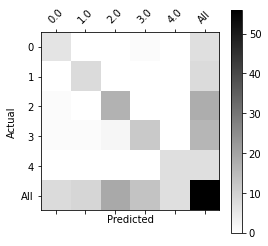

In [17]:
print(Y_test.shape)
print('           '+ label_to_emoji(0)+ '    ' + label_to_emoji(1) + '    ' +  label_to_emoji(2)+ '    ' + label_to_emoji(3)+'   ' + label_to_emoji(4))
print(pd.crosstab(Y_test, pred_test.reshape(56,), rownames=['Actual'], colnames=['Predicted'], margins=True))
plot_confusion_matrix(Y_test, pred_test)

## Emojifier-V2: Using LSTMs in Keras 

In [18]:
import numpy as np
import tensorflow
np.random.seed(0)
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Dropout, LSTM, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.initializers import glorot_uniform
np.random.seed(1)

<img src="images/emojifier-v2.png" style="width:700px;height:400px;"> <br>
<caption><center><font color='purple'><b>Figure 3</b>: Emojifier-V2. A 2-layer LSTM sequence classifier. </center></caption>

<img src="images/embedding1.png" style="width:700px;height:250px;">
<caption><center><font color='purple'><b>Figure 4</b>: Embedding layer</center></caption>

In [19]:
for idx, val in enumerate(['I', 'like', 'learning']):
    print(idx, val)

0 I
1 like
2 learning


In [20]:
def sentences_to_indices(X, word_to_index, max_len):
    m = X.shape[0]
    
    X_indices = np.zeros((m, max_len))
    
    for i in range(m):
        sentence_words = X[i].lower().split()
        j = 0
        
        for w in sentence_words:
            if w in word_to_index:
                X_indices[i,j] = word_to_index[w]
                j = j + 1
                
    return X_indices

In [21]:
X1 = np.array(['funny lol', 'lets play basketball', 'food is read for you'])
X1_indices = sentences_to_indices(X1, word_to_index, max_len=5)
print('X1 =', X1)
print('X1_indices =\n', X1_indices)

X1 = ['funny lol' 'lets play basketball' 'food is read for you']
X1_indices =
 [[155345. 225122.      0.      0.      0.]
 [220930. 286375.  69911.      0.      0.]
 [151204. 192973. 302207. 151349. 394475.]]


In [22]:
def pretrained_embedding_layer(word_to_vec_map, word_to_index):
    vocab_size = len(word_to_index) + 1
    any_word = list(word_to_vec_map.keys())[0]
    emb_dim = word_to_vec_map[any_word].shape[0]
    
    emb_matrix = np.zeros((vocab_size, emb_dim))
    
    for word, idx in word_to_index.items():
        emb_matrix[idx, :] = word_to_vec_map[word]
        
    embedding_layer = Embedding(vocab_size, emb_dim, trainable=False)
    
    embedding_layer.build((None,))
    
    embedding_layer.set_weights([emb_matrix])
    
    return embedding_layer

In [23]:
embedding_layer = pretrained_embedding_layer(word_to_vec_map, word_to_index)
print("weights[0][1][1] =", embedding_layer.get_weights()[0][1][1])
print("Input_dim", embedding_layer.input_dim)
print("Output_dim",embedding_layer.output_dim)

weights[0][1][1] = 0.39031
Input_dim 400001
Output_dim 50


In [24]:
def Emojify_V2(input_shape, word_to_vec_map, word_to_index):
    sentence_indices = Input(input_shape, dtype='int32')
    
    embedding_layer = pretrained_embedding_layer(word_to_vec_map, word_to_index)
    
    embeddings = embedding_layer(sentence_indices)
    
    X = LSTM(units = 128, return_sequences=True)(embeddings)
    X = Dropout(0.5)(X)
    X = LSTM(units = 128, return_sequences=False)(X)
    X = Dropout(0.5)(X)
    X = Dense(5)(X)
    X = Activation('softmax')(X)
    
    model = Model(sentence_indices, X)
    
    return model

In [25]:
model = Emojify_V2((maxLen,), word_to_vec_map, word_to_index)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 10, 50)            20000050  
_________________________________________________________________
lstm (LSTM)                  (None, 10, 128)           91648     
_________________________________________________________________
dropout (Dropout)            (None, 10, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 5)                

In [26]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
X_train_indices = sentences_to_indices(X_train, word_to_index, maxLen)
Y_train_oh = convert_to_one_hot(Y_train, C= 5)

In [28]:
model.fit(X_train_indices, Y_train_oh, epochs = 45, batch_size = 32, shuffle=True)

Epoch 1/45
5/5 [==============================] - 0s 33ms/step - loss: 1.5793 - accuracy: 0.2879
Epoch 2/45
5/5 [==============================] - 0s 38ms/step - loss: 1.4920 - accuracy: 0.3333
Epoch 3/45
5/5 [==============================] - 0s 22ms/step - loss: 1.4333 - accuracy: 0.3864
Epoch 4/45
5/5 [==============================] - 0s 22ms/step - loss: 1.3692 - accuracy: 0.4621
Epoch 5/45
5/5 [==============================] - 0s 34ms/step - loss: 1.2723 - accuracy: 0.5152
Epoch 6/45
5/5 [==============================] - 0s 22ms/step - loss: 1.2225 - accuracy: 0.4924
Epoch 7/45
5/5 [==============================] - 0s 23ms/step - loss: 1.0487 - accuracy: 0.6288
Epoch 8/45
5/5 [==============================] - 0s 21ms/step - loss: 1.0204 - accuracy: 0.6742
Epoch 9/45
5/5 [==============================] - 0s 23ms/step - loss: 0.9254 - accuracy: 0.6515
Epoch 10/45
5/5 [==============================] - 0s 34ms/step - loss: 0.8244 - accuracy: 0.6742
Epoch 11/45
5/5 [============

In [29]:
X_test_indices = sentences_to_indices(X_test, word_to_index, max_len = maxLen)
Y_test_oh = convert_to_one_hot(Y_test, C = 5)
loss, acc = model.evaluate(X_test_indices, Y_test_oh)
print()
print('Test accuracy = ', acc)

2/2 [==============================] - 0s 3ms/step - loss: 0.4340 - accuracy: 0.8750

Test accuracy =  0.875


In [30]:
# mislabelled examples
C = 5
y_test_oh = np.eye(C)[Y_test.reshape(-1)]
X_test_indices = sentences_to_indices(X_test, word_to_index, maxLen)
pred = model.predict(X_test_indices)
for i in range(len(X_test)):
    x = X_test_indices
    num = np.argmax(pred[i])
    if(num != Y_test[i]):
        print('Expected emoji:' + label_to_emoji(Y_test[i]) + 'prediction: ' + X_test[i] + label_to_emoji(num).strip())

Expected emoji:😞prediction: work is hard	😄
Expected emoji:😞prediction: This girl is messing with me	❤
Expected emoji:😞prediction: work is horrible	😄
Expected emoji:🍴prediction: any suggestions for dinner	😄
Expected emoji:😞prediction: she is a bully	❤
Expected emoji:😞prediction: My life is so boring	❤
Expected emoji:😄prediction: will you be my valentine	😞


In [42]:
x_test = np.array(['I cannot play'])
X_test_indices = sentences_to_indices(x_test, word_to_index, maxLen)
print(x_test[0] + ' ' + label_to_emoji(np.argmax(model.predict(X_test_indices))))

I cannot play ⚾
